In [6]:
from QuantiusResult import importAnnotations
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

from sklearn.cluster import AffinityPropagation
from sklearn import metrics

from itertools import cycle

# Objective
This notebook explores the analysis of crowd-sourced annotation of RNA FISH data.

# Data set
The annotated image is a crop of an image of ACTB RNA detected via padlock probes and amplified with rolling circle amplification. The images were acquired on a widefield epifluorescence microscope with a 20x 0.80 NA dry objective (pixels are 325 x 325 nm^2 in the sample plane). We created square crops of varying sizes ranging from 150-300 px wide of a single field of view (all crops aligned in the upper left hand corder). The image was annotated by 20 people on Mechanical Turk via Quantius. The data are imported via the function importAnnotations() into a Pandas DataFrame with the following columns:

annotation DataFrame columns (each row is an annotation):
* timestamp - this is a timestamp for the annotation, but I am unsure of the units - need to discuss with Quantius
* x - the x-coordinate of the annotation
* y - the y-coordinate of the annotation
* annotation_type - the type of annotation that was requested. "crosshair" is used for point selection.
* height - height of the image in pixels
* width - width of the image in pixels
* image_filename - filename of the image that was annotated
* time_when_completed - time when the worker finished annotating the image
* worker_id - unique identifier for the worker that performed the annotation

Note that for the coordinates, the origin (0, 0) is in the upper left hand corner of the image with +x to the right and +y down.

In [7]:
anno = importAnnotations('cy5contrasted.json')

In [8]:
def clusterAnnotations(image_filename, annotations, pref):
    coords = annotations.loc[annotations['image_filename'] == image_filename, ['x', 'y']].as_matrix()

    af = AffinityPropagation(preference=pref).fit(coords)
    cluster_centers_indices = af.cluster_centers_indices_
    labels = af.labels_

    n_clusters_ = len(cluster_centers_indices)
    
    return [cluster_centers_indices, labels, n_clusters_]

def plotAnnotations(image_filename, annotations, cluster_centers_indices, labels, n_clusters, min_annotations):
    
    coords = annotations.loc[annotations['image_filename'] == image_filename, ['x', 'y']].as_matrix()
    
    im_height = annotations.loc[annotations['image_filename'] == image_filename, 'height'].unique()[0]
    
    fig=plt.figure(figsize=(18, 16), dpi= 80)

    img = mpimg.imread('./Crops/' + image_filename)
    imgplot = plt.imshow(img)

    colors = cycle('bgrcmybgrcmybgrcmybgrcmy')
    
    for k, col in zip(range(n_clusters), colors):
        class_members = labels == k
    
        if sum(class_members) < min_annotations:
            col = 'k'
    
        cluster_center = coords[cluster_centers_indices[k]]
        plt.plot(coords[class_members, 0], im_height - coords[class_members, 1], col + '.')
        plt.scatter(cluster_center[0], im_height - cluster_center[1], facecolors='none', edgecolor = col, s = 150)

    plt.title('Estimated number of clusters: %d' % n_clusters)
    plt.show()


cy5contrasted_100pxroi.png


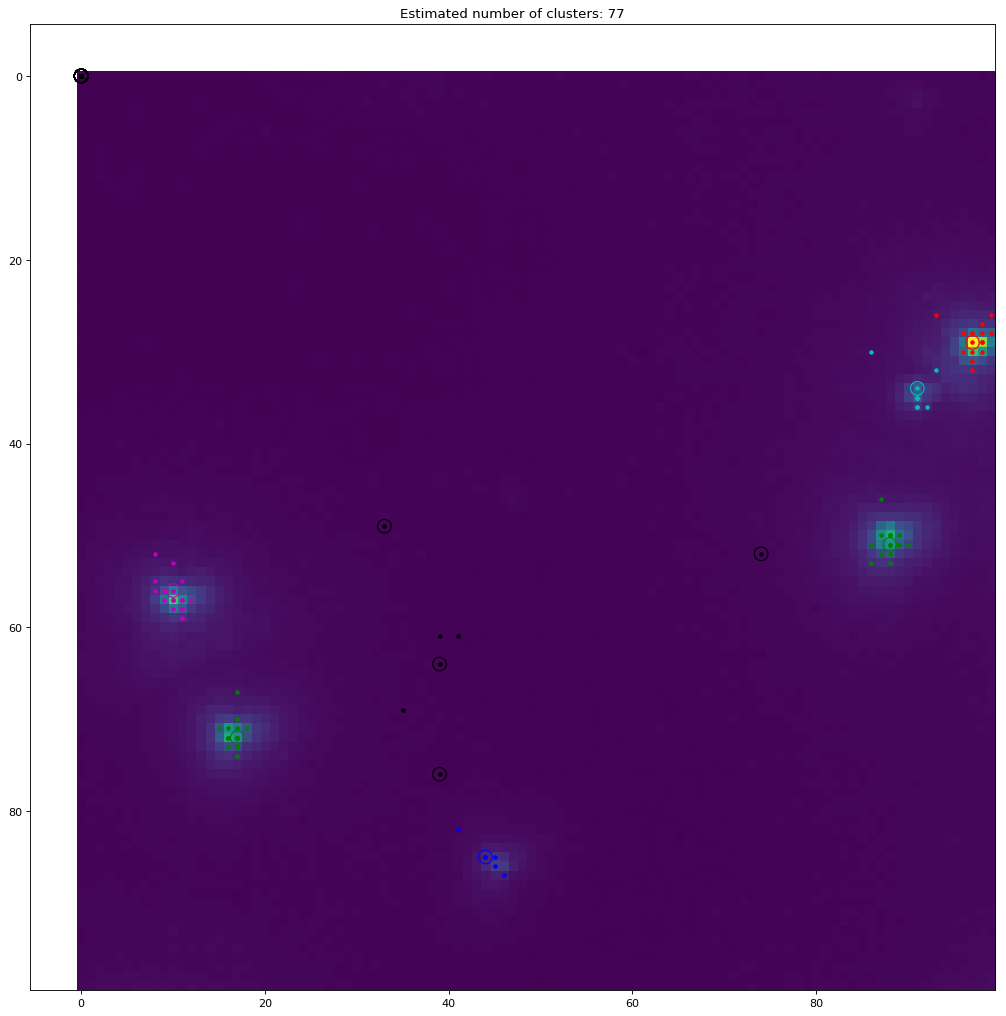

cy5contrasted_250pxroi.png


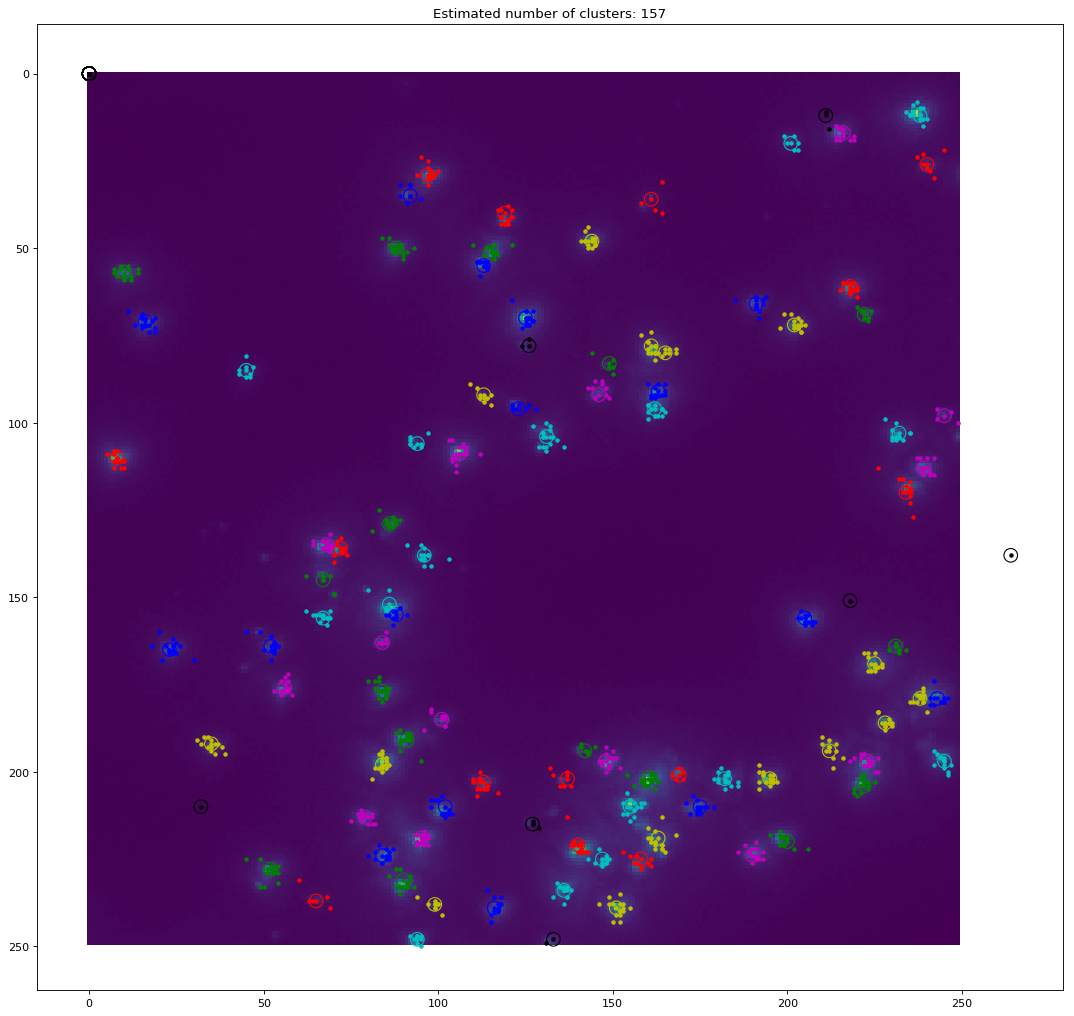

cy5contrasted_150pxroi.png


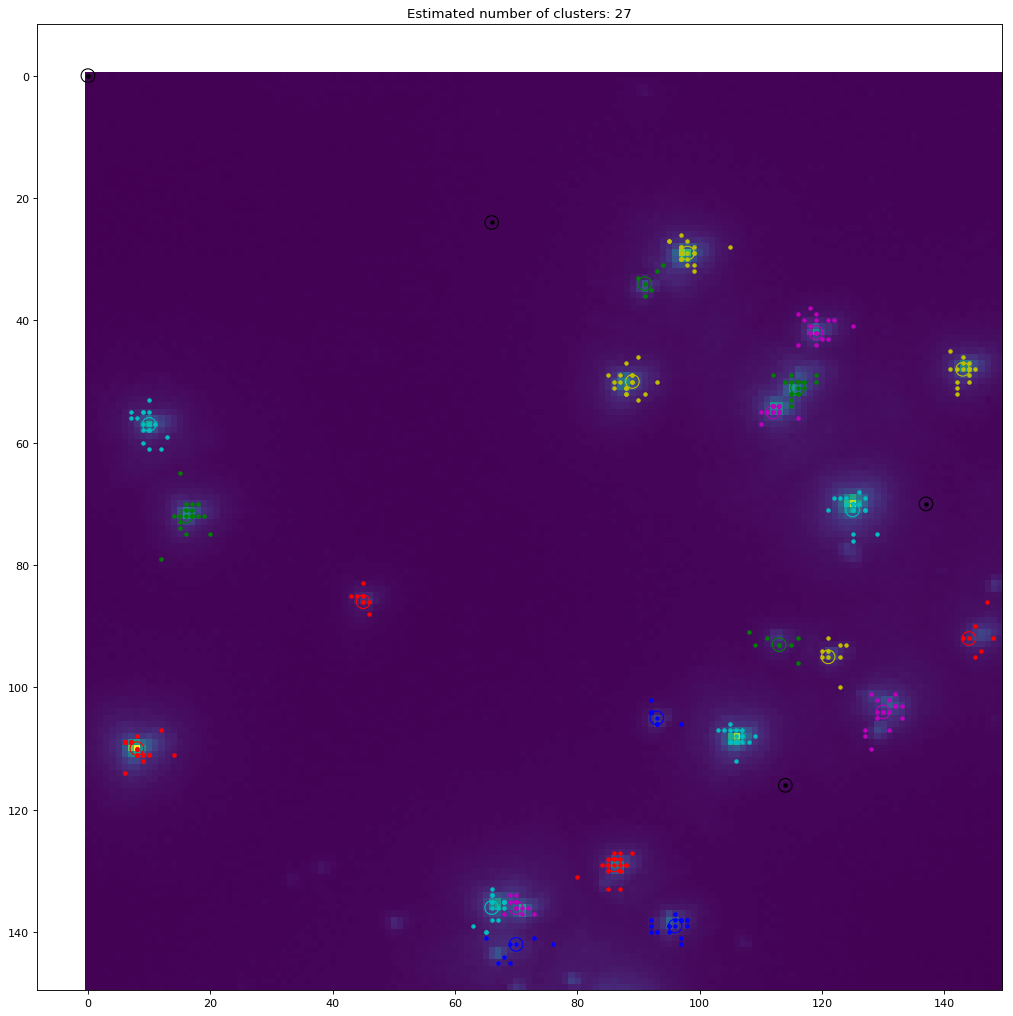

cy5contrasted_200pxroi.png


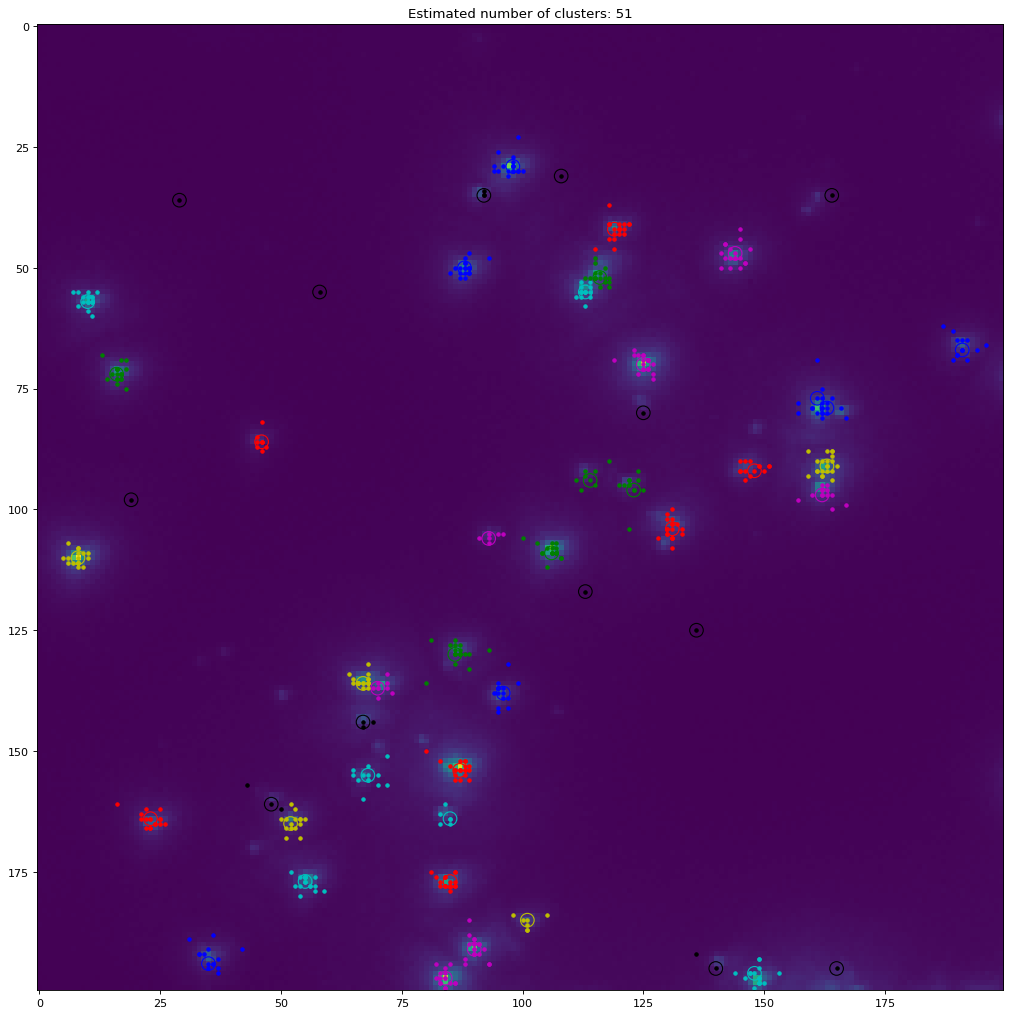

cy5contrasted_300pxroi.png


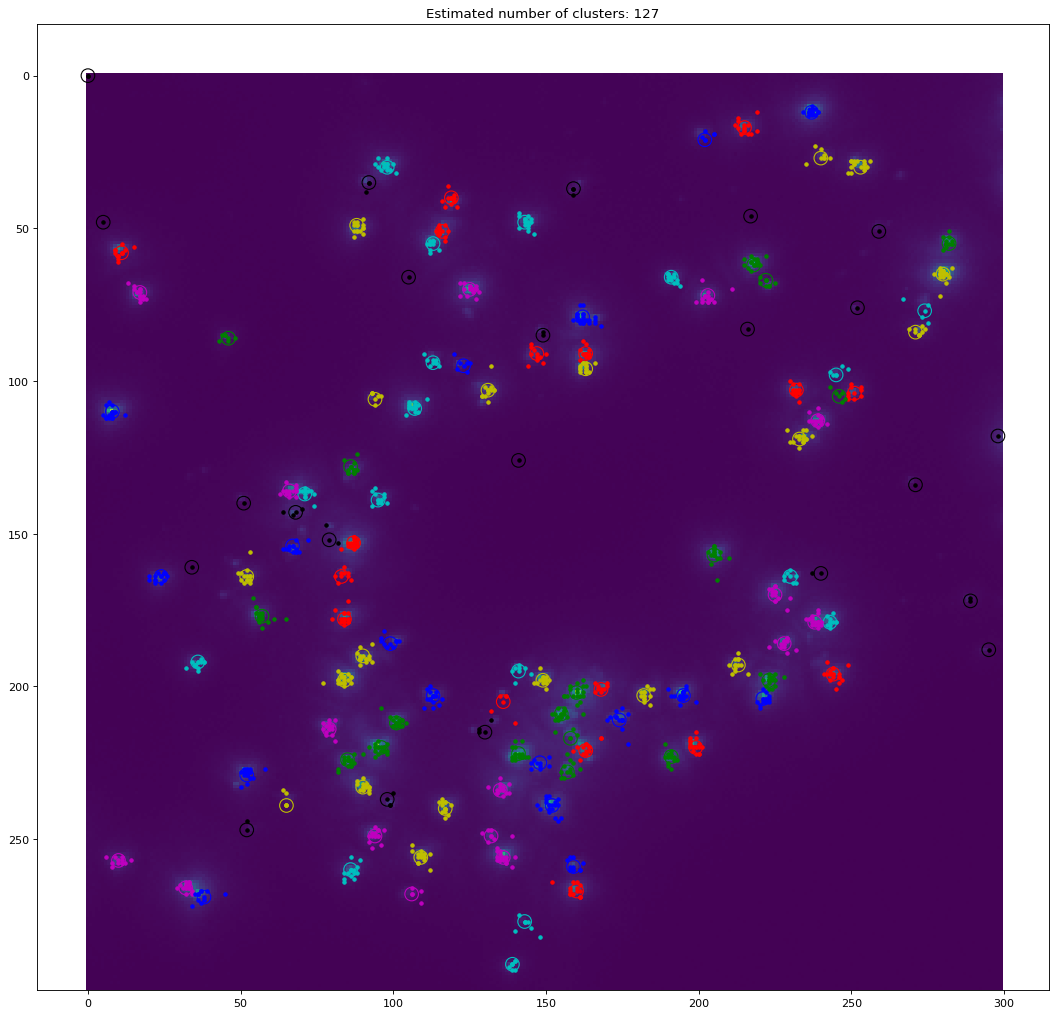

In [9]:
filenames = anno['image_filename'].unique()

for im in filenames:
    [cluster_center_indices, labels, n_clusters] = clusterAnnotations(im, anno, -100)
    print(im)
    plotAnnotations(im, anno, cluster_center_indices, labels, n_clusters, 5)

In [ ]:
anno.head